# Testing Addicted Q Agent

In [154]:
%load_ext autoreload
%autoreload 2

from q_addicted import Addicted_Q_Agent
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Basic Configurations

In [155]:
CONFIGS = {
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1,
    'num_trials': 100,
    'num_states': 10,
    'num_actions': 3,
    'initial_dopamine_surge': 1,
    'dopamine_decay_rate': 0.99,
    'reward_states': [0, 9],
    'drug_reward': 1,
    'addicted': True
}

# Addicted Agent Learning

In [156]:
agent_epsilon_greedy = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted']
)

agent_boltzmann_exploration = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy = 'boltzmann_exploration'
)

rpe, Q_across_trials = agent_epsilon_greedy.learning()
rpe_2, Q_across_trials_2 = agent_boltzmann_exploration.learning()

### Heatmap comparison for different actions using Q and rpe

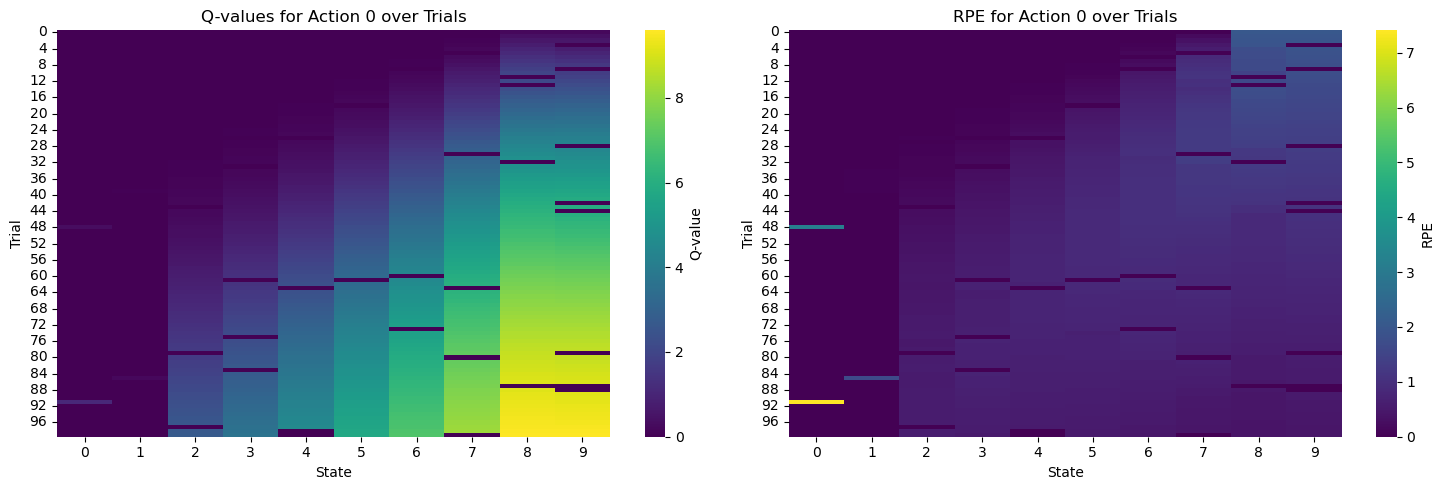

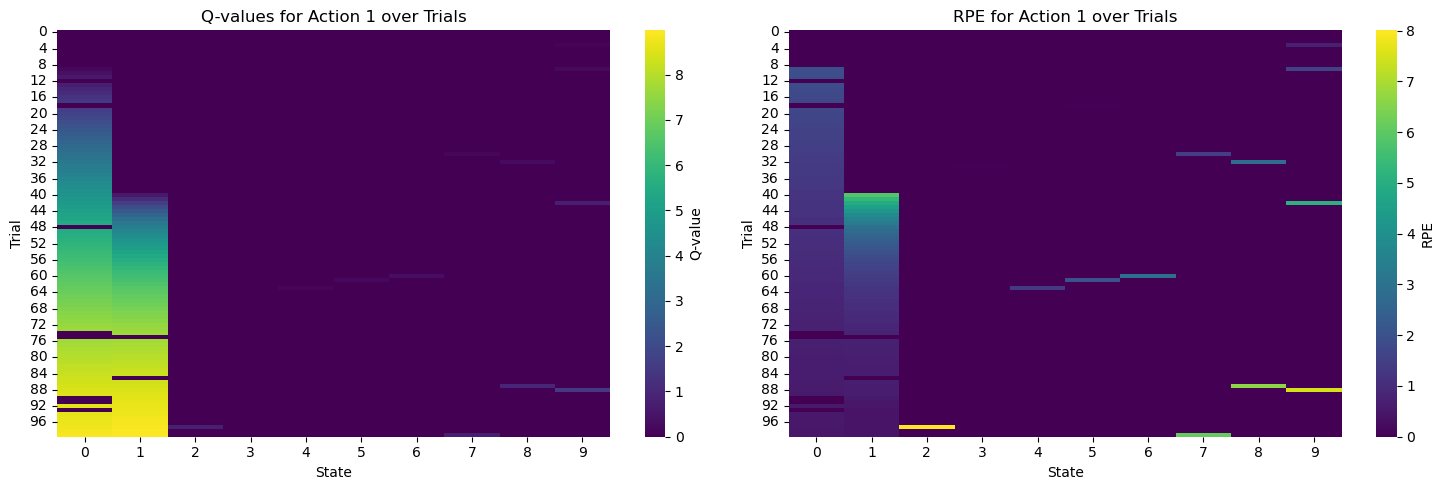

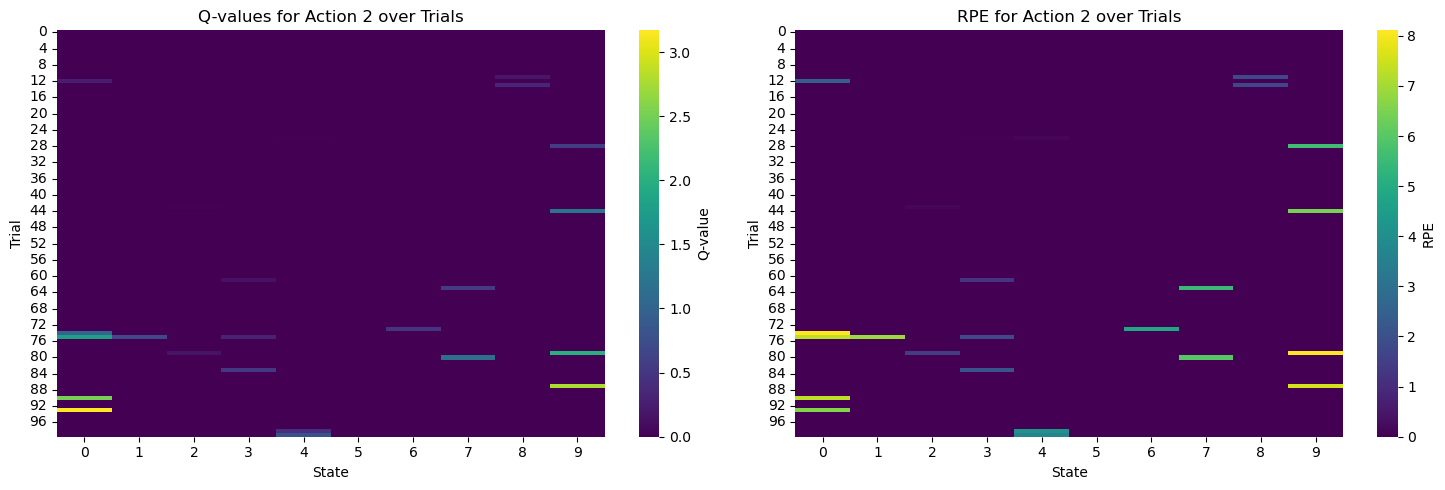

In [157]:
plot_heatmap(Q_across_trials, rpe)

seems like leading to state 5, and remain at state 5, proporgate backward starts even from the 9th state when the 10th state is also a addicted state.

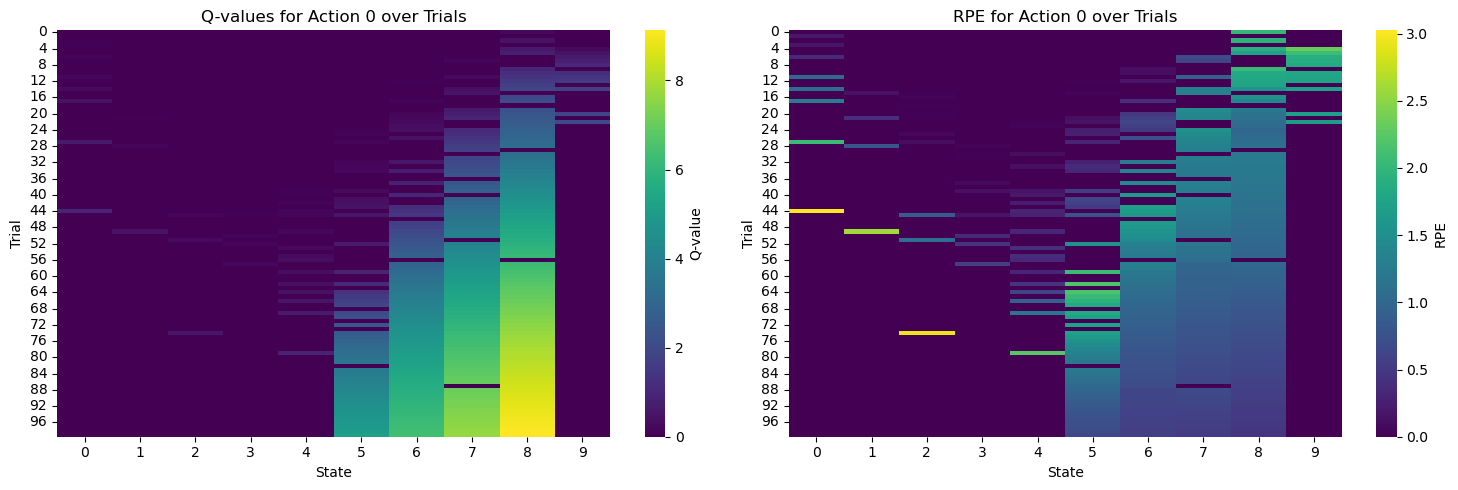

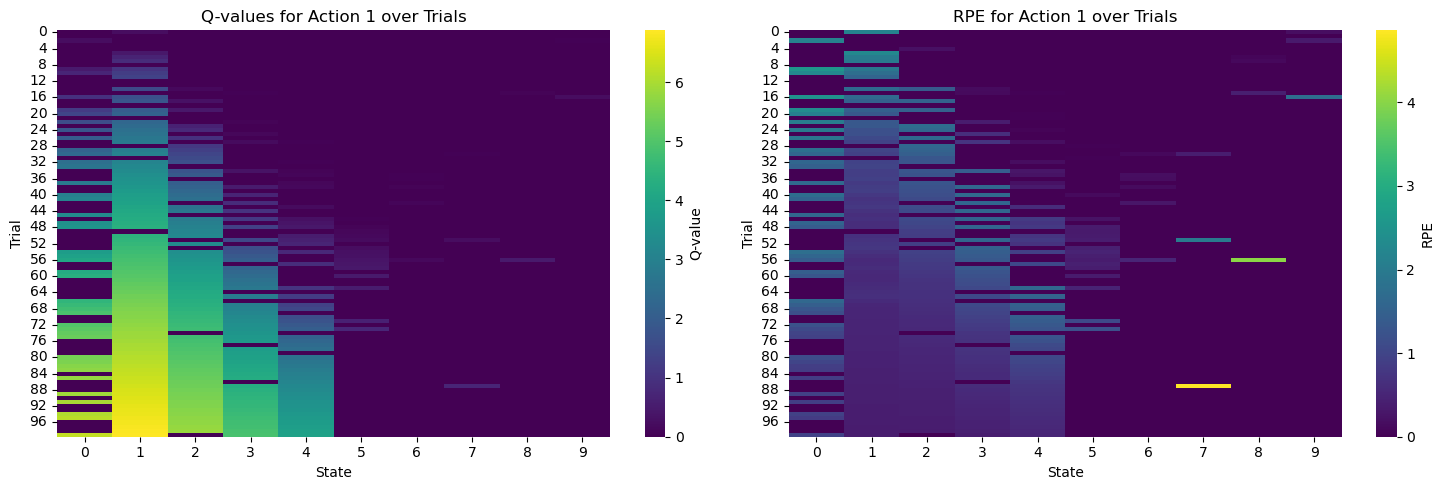

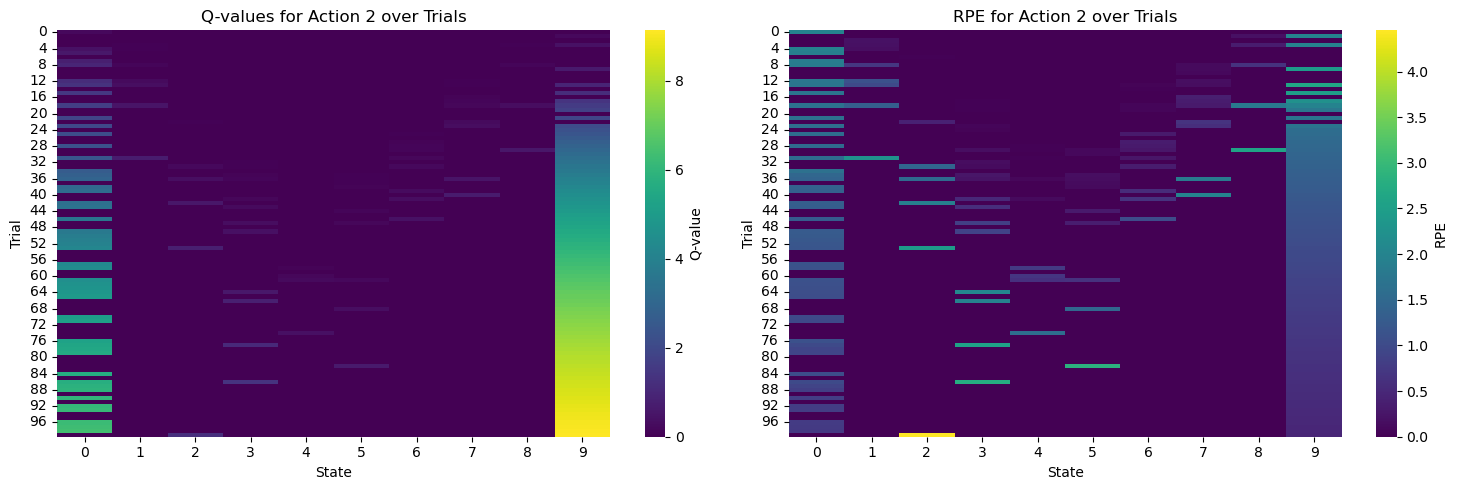

In [158]:
plot_heatmap(Q_across_trials_2, rpe_2)

Similar trend in the boltzmann_exploration agent. The agents discovered both teh drug state and proporgates rewrad back accordingly

# Stochastic process comparison (random walk) for average visit time

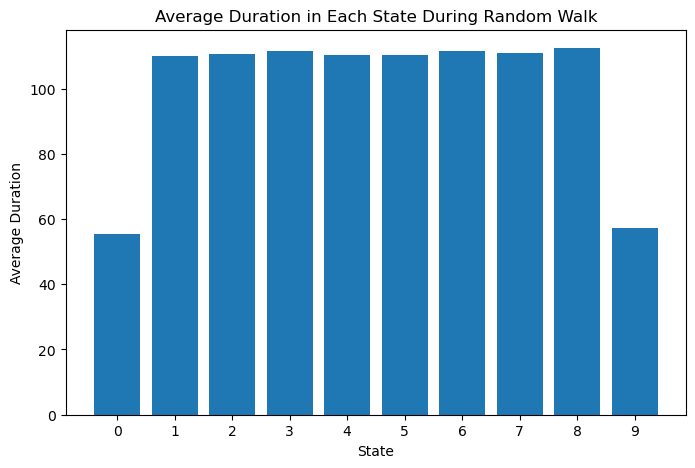

In [159]:
num_trials = 100
num_steps = 1000
avg_durations = agent_epsilon_greedy.random_walk(num_trials, num_steps)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State During Random Walk')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

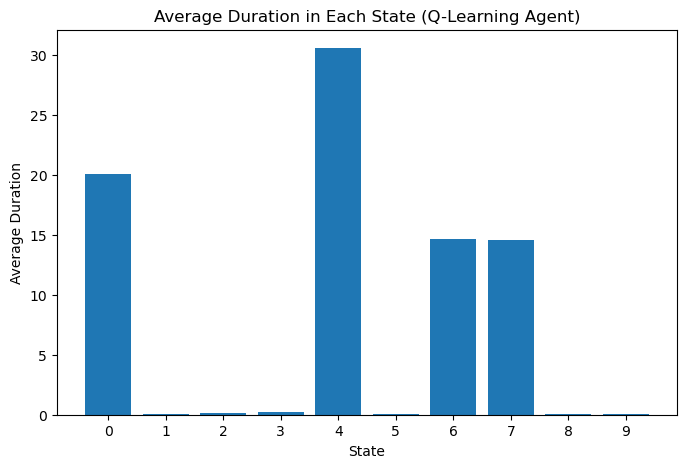

In [160]:
num_re_trials = 10000
max_action_per_trial = 100
avg_durations = agent_epsilon_greedy.resimulate_state_durations(num_re_trials, max_action_per_trial)

plt.figure(figsize=(8, 5))
plt.bar(range(CONFIGS['num_states']), avg_durations)
plt.title('Average Duration in Each State (Q-Learning Agent)')
plt.xlabel('State')
plt.ylabel('Average Duration')
plt.xticks(range(CONFIGS['num_states']))
plt.show()

# Coomparison of different search strategy

In [161]:
CONFIGS = {
    'alpha': 0.1,
    'gamma': 0.9,
    'epsilon': 0.1,
    'num_trials': 500,
    'num_states': 10,
    'num_actions': 3,
    'initial_dopamine_surge': 1,
    'dopamine_decay_rate': 0.99,
    'reward_states': [0,9],
    'drug_reward': 1,
    'addicted': True
}

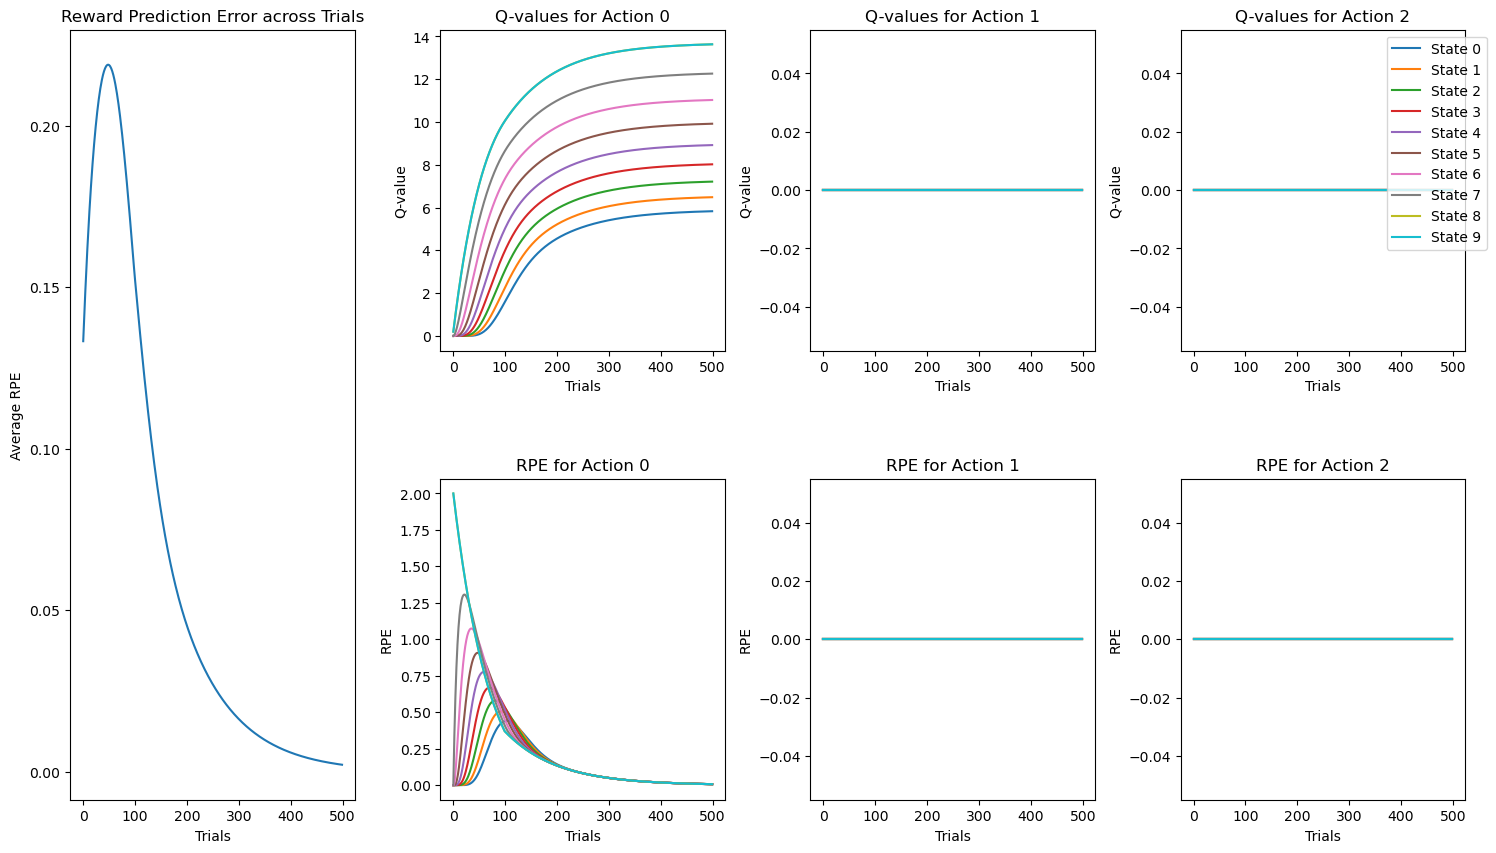

In [162]:
exploration_strategy = 'greedy'

agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy
)

rpe1, Q_across_trials = agent.learning()
plot_avg_rpe_action(rpe1, Q_across_trials)

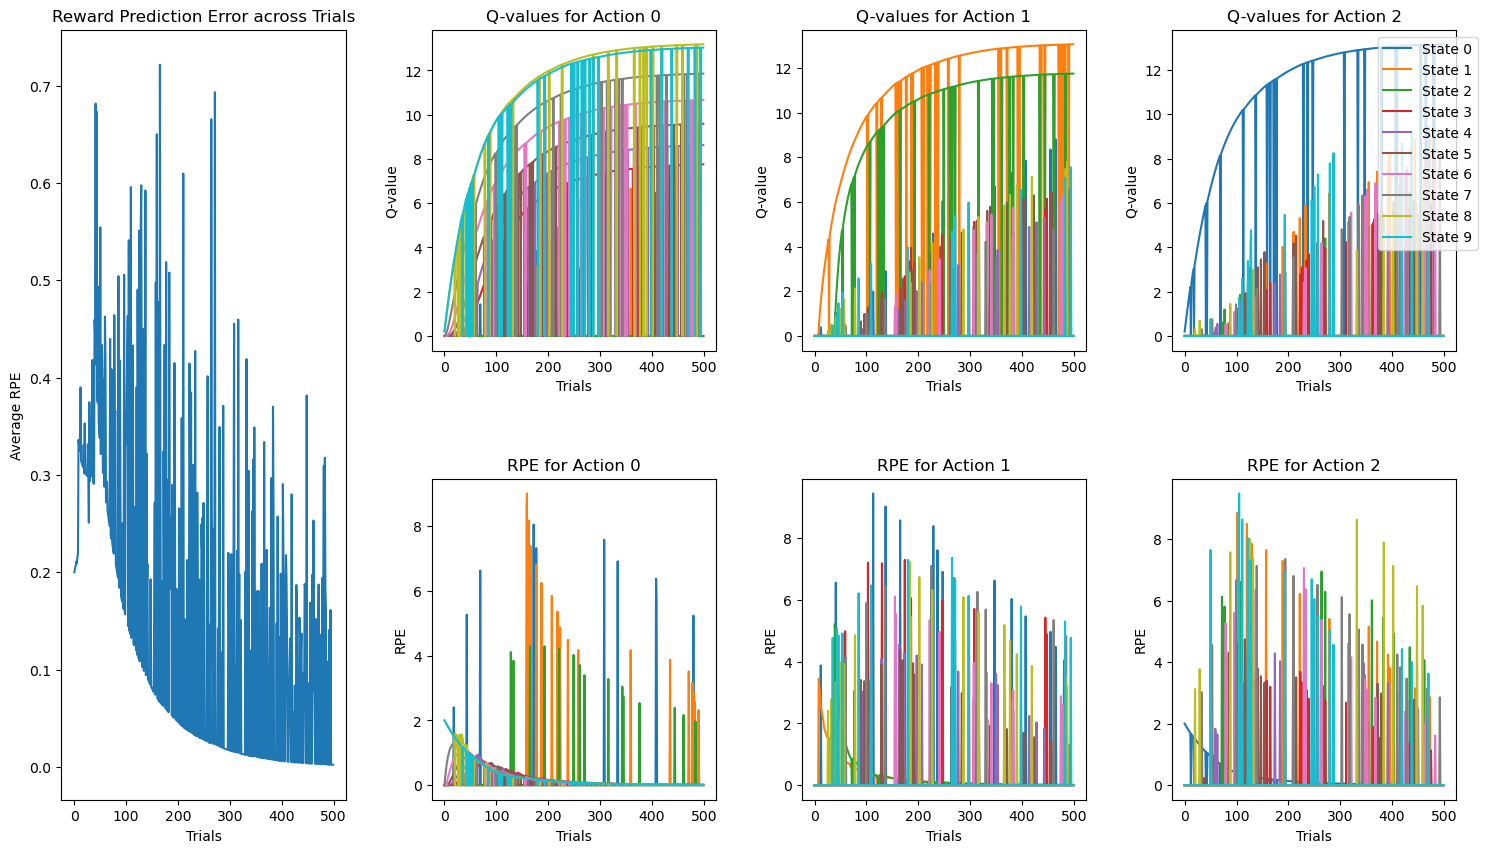

In [163]:
exploration_strategy = 'epsilon_greedy'

agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy
)

rpe2, Q_across_trials = agent.learning()
plot_avg_rpe_action(rpe2, Q_across_trials)

### Boltzmann Exploration

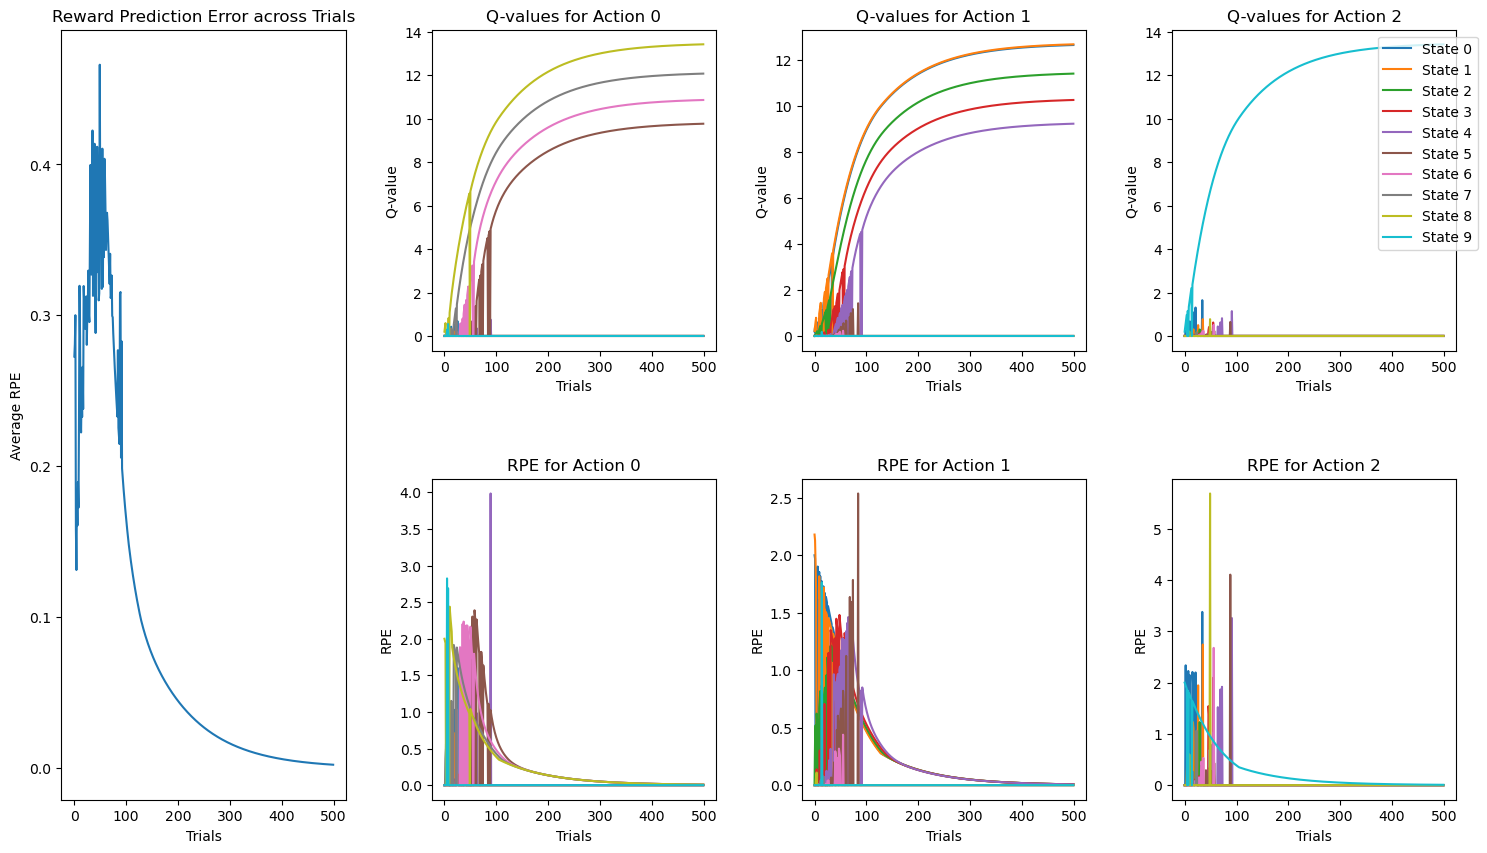

In [164]:
exploration_strategy = 'boltzmann_exploration'

agent = Addicted_Q_Agent(
    CONFIGS['alpha'],
    CONFIGS['gamma'],
    CONFIGS['epsilon'],
    CONFIGS['num_trials'],
    CONFIGS['num_states'],
    CONFIGS['num_actions'],
    CONFIGS['initial_dopamine_surge'],
    CONFIGS['dopamine_decay_rate'],
    CONFIGS['reward_states'],
    CONFIGS['drug_reward'],
    CONFIGS['addicted'],
    exploration_strategy
)
rpe3, Q_across_trials = agent.learning()
plot_avg_rpe_action(rpe3, Q_across_trials)

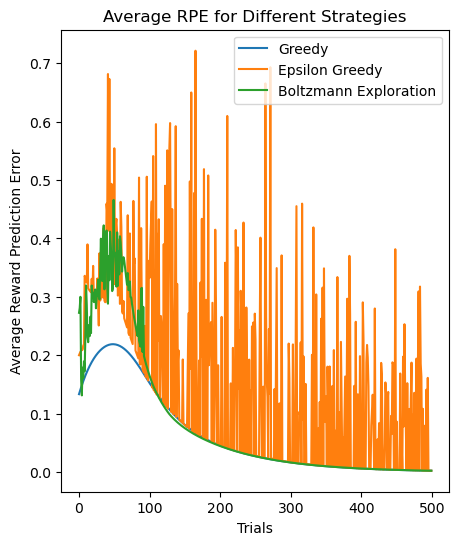

In [170]:
all_rpe = [rpe1, rpe2, rpe3]
strategies = ['Greedy', 'Epsilon Greedy', 'Boltzmann Exploration']
average_rpe = [rpe.mean(axis=(1, 2)) for rpe in all_rpe]

plt.figure(figsize=(5, 6))
for strategy, avg_rpe in zip(strategies, average_rpe):
    plt.plot(avg_rpe, label=strategy)

plt.xlabel("Trials")
plt.ylabel("Average Reward Prediction Error")
plt.legend()
plt.title("Average RPE for Different Strategies")
plt.show()

Boltzmann exploration uses a probabilistic approach based on the estimated action values. The idea is to select actions according to a probability distribution, where actions with higher estimated values are chosen more frequently, but there is always a non-zero probability of selecting lower-value actions.

- Simply puts the schematic under a normalization weighting process to not use just the absolute Q value but rather the probability of it by comparing with Q value with other actions.

- Some what more rational strategy -> understanding not only the Q of an action but also the relationship between action through a probabilistic paradigm.

- Forming a much robust understanding and interpretation of the enviornment and space.